In [1]:
import os
import scanpy as sc
from scipy import sparse
import pandas as pd
import copy

In [2]:
counts=pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE138852_counts.csv',index_col=0)

In [3]:
counts=counts.T

In [4]:
counts

,FO538757.2,AP006222.2,RP5-857K21.4,RP11-206L10.9,NOC2L,HES4,ISG15,AGRN,C1orf159,SDF4,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-CYB,AL592183.1,AC007325.4,AC007325.2
AAACCTGGTAGAAAGG_AD5_AD6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
AAACCTGGTAGCGATG_AD5_AD6,0,0,0,0,0,0,0,0,0,0,...,3,2,4,0,6,0,0,0,0,0
AAACCTGTCAGTCAGT_AD5_AD6,0,0,0,0,0,0,0,0,0,0,...,0,3,3,0,2,1,1,1,0,0
AAACCTGTCCAAACAC_AD5_AD6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
AAACCTGTCCAGTATG_AD5_AD6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCGTACAA_AD1_AD2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
TTTGTCACAAGCCATT_AD1_AD2,0,0,0,0,1,0,1,0,0,0,...,3,1,1,0,4,0,0,0,0,0
TTTGTCAGTATAGGTA_AD1_AD2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
TTTGTCATCCACTGGG_AD1_AD2,0,0,1,0,0,0,1,0,0,0,...,0,1,1,0,0,0,1,0,0,0


In [5]:
counts.index

Index(['AAACCTGGTAGAAAGG_AD5_AD6', 'AAACCTGGTAGCGATG_AD5_AD6',
       'AAACCTGTCAGTCAGT_AD5_AD6', 'AAACCTGTCCAAACAC_AD5_AD6',
       'AAACCTGTCCAGTATG_AD5_AD6', 'AAAGCAACATGGGAAC_AD5_AD6',
       'AAAGCAAGTCGAATCT_AD5_AD6', 'AAAGCAAGTTTGTTGG_AD5_AD6',
       'AAAGTAGGTAATCACC_AD5_AD6', 'AAAGTAGGTTCCACGG_AD5_AD6',
       ...
       'TTTGGTTAGCCACGCT_AD1_AD2', 'TTTGGTTCAACTTGAC_AD1_AD2',
       'TTTGGTTCAGCCTTTC_AD1_AD2', 'TTTGGTTCATCGGACC_AD1_AD2',
       'TTTGGTTTCCCAGGTG_AD1_AD2', 'TTTGGTTTCCGTACAA_AD1_AD2',
       'TTTGTCACAAGCCATT_AD1_AD2', 'TTTGTCAGTATAGGTA_AD1_AD2',
       'TTTGTCATCCACTGGG_AD1_AD2', 'TTTGTCATCCGGGTGT_AD1_AD2'],
      dtype='object', length=13214)

In [6]:
counts.columns

Index(['FO538757.2', 'AP006222.2', 'RP5-857K21.4', 'RP11-206L10.9', 'NOC2L',
       'HES4', 'ISG15', 'AGRN', 'C1orf159', 'SDF4',
       ...
       'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-CYB',
       'AL592183.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=10850)

In [7]:
adata=sc.AnnData(counts,
                counts.index.to_frame(),
                counts.columns.to_frame())

C:\Users\23247\AppData\Local\Temp\ipykernel_11824\508290653.py:1: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata=sc.AnnData(counts,


In [8]:
adata

AnnData object with n_obs × n_vars = 13214 × 10850
    obs: 0
    var: 0

In [9]:
adata.obs.rename(columns={0: 'cell_id'},inplace=True)

In [10]:
adata.var.rename(columns={0: 'gene_name'},inplace=True)

In [11]:
adata

AnnData object with n_obs × n_vars = 13214 × 10850
    obs: 'cell_id'
    var: 'gene_name'

In [12]:
adata.X = sparse.csr_matrix(adata.X)

In [13]:
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

In [14]:
adata

AnnData object with n_obs × n_vars = 13214 × 10850
    obs: 'cell_id', 'n_genes_by_counts', 'total_counts'
    var: 'gene_name', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [15]:
adata.obs

,cell_id,n_genes_by_counts,total_counts
AAACCTGGTAGAAAGG_AD5_AD6,AAACCTGGTAGAAAGG_AD5_AD6,564,760.0
AAACCTGGTAGCGATG_AD5_AD6,AAACCTGGTAGCGATG_AD5_AD6,527,720.0
AAACCTGTCAGTCAGT_AD5_AD6,AAACCTGTCAGTCAGT_AD5_AD6,773,1209.0
AAACCTGTCCAAACAC_AD5_AD6,AAACCTGTCCAAACAC_AD5_AD6,615,925.0
AAACCTGTCCAGTATG_AD5_AD6,AAACCTGTCCAGTATG_AD5_AD6,434,562.0
...,...,...,...
TTTGGTTTCCGTACAA_AD1_AD2,TTTGGTTTCCGTACAA_AD1_AD2,339,442.0
TTTGTCACAAGCCATT_AD1_AD2,TTTGTCACAAGCCATT_AD1_AD2,459,532.0
TTTGTCAGTATAGGTA_AD1_AD2,TTTGTCAGTATAGGTA_AD1_AD2,330,383.0
TTTGTCATCCACTGGG_AD1_AD2,TTTGTCATCCACTGGG_AD1_AD2,603,868.0


In [16]:
adata.var

,gene_name,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
FO538757.2,FO538757.2,1613,0.134781,87.793250,1781.0
AP006222.2,AP006222.2,356,0.028379,97.305888,375.0
RP5-857K21.4,RP5-857K21.4,1554,0.130241,88.239746,1721.0
RP11-206L10.9,RP11-206L10.9,359,0.028606,97.283185,378.0
NOC2L,NOC2L,437,0.034282,96.692901,453.0
...,...,...,...,...,...
MT-ND5,MT-ND5,754,0.064401,94.293931,851.0
MT-CYB,MT-CYB,3417,0.417209,74.141063,5513.0
AL592183.1,AL592183.1,1403,0.116392,89.382473,1538.0
AC007325.4,AC007325.4,297,0.023082,97.752384,305.0


In [17]:
adata = adata[adata.obs.total_counts < 75000, :]

In [18]:
adata

View of AnnData object with n_obs × n_vars = 13214 × 10850
    obs: 'cell_id', 'n_genes_by_counts', 'total_counts'
    var: 'gene_name', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [19]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

D:\Anaconda3\envs\pytorch\lib\site-packages\scanpy\preprocessing\_simple.py:140: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['n_genes'] = number


In [20]:
adata

AnnData object with n_obs × n_vars = 13214 × 10850
    obs: 'cell_id', 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'gene_name', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

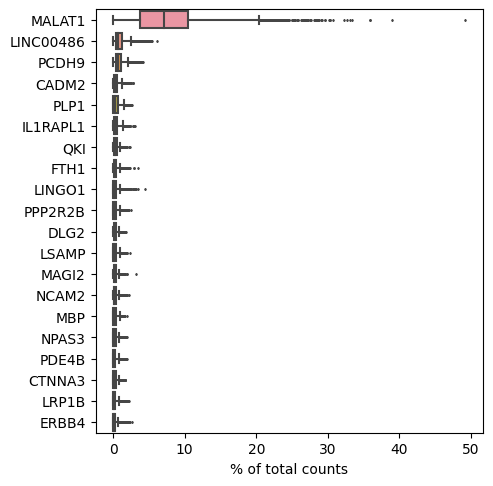

In [21]:
sc.pl.highest_expr_genes(adata, n_top=20, )

In [22]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

In [23]:
adata.var

,gene_name,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,n_cells,mt
FO538757.2,FO538757.2,1613,0.134781,87.793250,1781.0,1613,False
AP006222.2,AP006222.2,356,0.028379,97.305888,375.0,356,False
RP5-857K21.4,RP5-857K21.4,1554,0.130241,88.239746,1721.0,1554,False
RP11-206L10.9,RP11-206L10.9,359,0.028606,97.283185,378.0,359,False
NOC2L,NOC2L,437,0.034282,96.692901,453.0,437,False
...,...,...,...,...,...,...,...
MT-ND5,MT-ND5,754,0.064401,94.293931,851.0,754,True
MT-CYB,MT-CYB,3417,0.417209,74.141063,5513.0,3417,True
AL592183.1,AL592183.1,1403,0.116392,89.382473,1538.0,1403,False
AC007325.4,AC007325.4,297,0.023082,97.752384,305.0,297,False


In [24]:
adata.obs # pct_counts_mt 每个细胞中的线粒体基因的表达占总基因表达量的百分比

,cell_id,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt
AAACCTGGTAGAAAGG_AD5_AD6,AAACCTGGTAGAAAGG_AD5_AD6,564,760.0,564,3.0,0.394737
AAACCTGGTAGCGATG_AD5_AD6,AAACCTGGTAGCGATG_AD5_AD6,527,720.0,527,21.0,2.916667
AAACCTGTCAGTCAGT_AD5_AD6,AAACCTGTCAGTCAGT_AD5_AD6,773,1209.0,773,14.0,1.157982
AAACCTGTCCAAACAC_AD5_AD6,AAACCTGTCCAAACAC_AD5_AD6,615,925.0,615,1.0,0.108108
AAACCTGTCCAGTATG_AD5_AD6,AAACCTGTCCAGTATG_AD5_AD6,434,562.0,434,3.0,0.533808
...,...,...,...,...,...,...
TTTGGTTTCCGTACAA_AD1_AD2,TTTGGTTTCCGTACAA_AD1_AD2,339,442.0,339,2.0,0.452489
TTTGTCACAAGCCATT_AD1_AD2,TTTGTCACAAGCCATT_AD1_AD2,459,532.0,459,13.0,2.443609
TTTGTCAGTATAGGTA_AD1_AD2,TTTGTCAGTATAGGTA_AD1_AD2,330,383.0,330,4.0,1.044386
TTTGTCATCCACTGGG_AD1_AD2,TTTGTCATCCACTGGG_AD1_AD2,603,868.0,603,6.0,0.691244


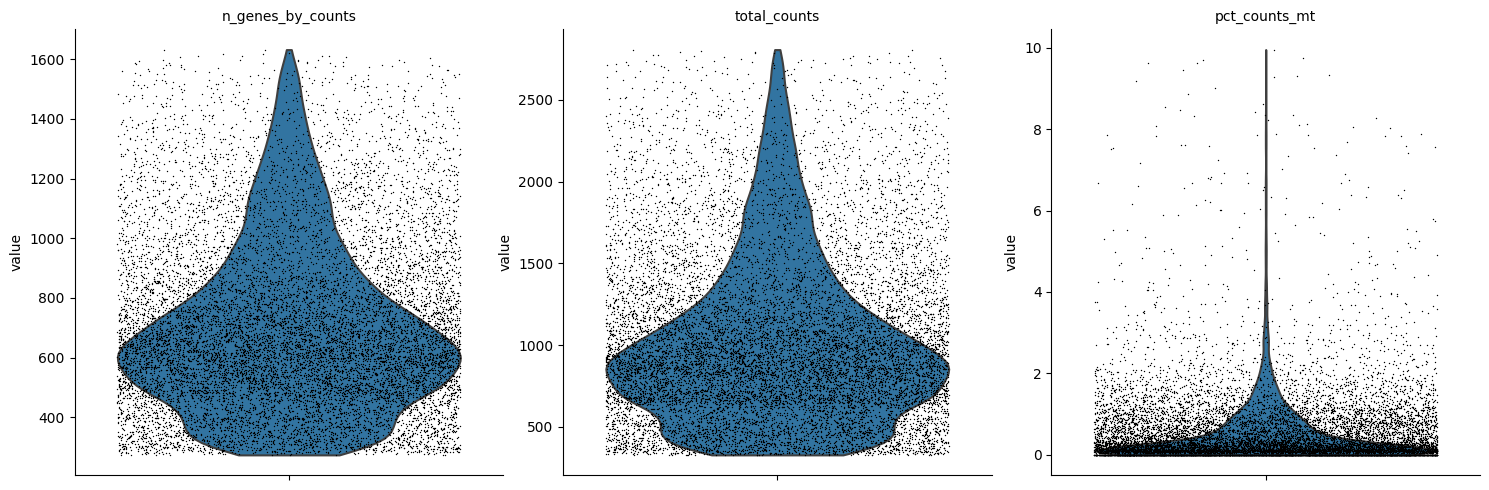

In [25]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

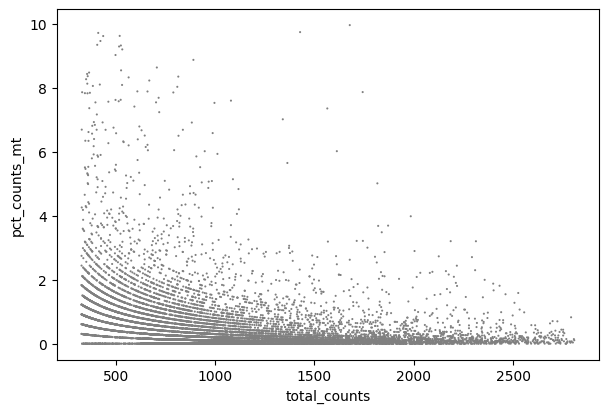

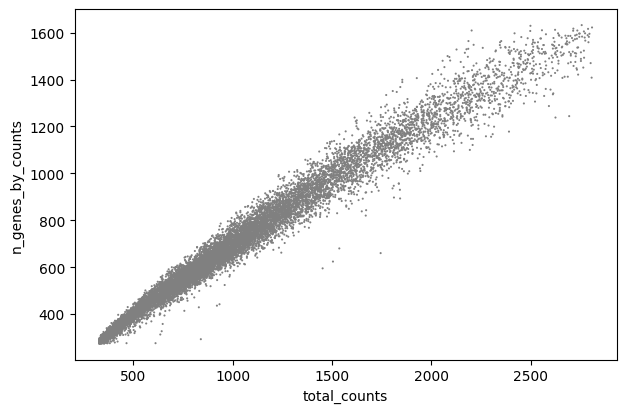

In [26]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [27]:
adata.raw = adata

In [28]:
covariates=pd.read_csv('D:/MyData/scEDGE_Generation/data/GSE138852_covariates.csv')

In [29]:
covariates

,Unnamed: 0,oupSample.batchCond,oupSample.cellType,oupSample.cellType_batchCond,oupSample.subclustID,oupSample.subclustCond
0,AAACCTGGTAGAAAGG_AD5_AD6,AD,oligo,oligo_AD,o3,AD
1,AAACCTGGTAGCGATG_AD5_AD6,AD,oligo,oligo_AD,o3,AD
2,AAACCTGTCAGTCAGT_AD5_AD6,AD,oligo,oligo_AD,o3,AD
3,AAACCTGTCCAAACAC_AD5_AD6,AD,oligo,oligo_AD,o3,AD
4,AAACCTGTCCAGTATG_AD5_AD6,AD,oligo,oligo_AD,o3,AD
...,...,...,...,...,...,...
13209,TTTGGTTTCCGTACAA_AD1_AD2,AD,oligo,oligo_AD,o3,AD
13210,TTTGTCACAAGCCATT_AD1_AD2,AD,doublet,doublet_AD,d2,AD
13211,TTTGTCAGTATAGGTA_AD1_AD2,AD,doublet,doublet_AD,d4,undetermined
13212,TTTGTCATCCACTGGG_AD1_AD2,AD,oligo,oligo_AD,o1,AD


In [30]:
covariates=covariates.rename(columns={'Unnamed: 0': 'cell_id'})

In [31]:
new_obs=adata.obs.merge(covariates,on='cell_id')

In [32]:
new_obs

,cell_id,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,oupSample.batchCond,oupSample.cellType,oupSample.cellType_batchCond,oupSample.subclustID,oupSample.subclustCond
0,AAACCTGGTAGAAAGG_AD5_AD6,564,760.0,564,3.0,0.394737,AD,oligo,oligo_AD,o3,AD
1,AAACCTGGTAGCGATG_AD5_AD6,527,720.0,527,21.0,2.916667,AD,oligo,oligo_AD,o3,AD
2,AAACCTGTCAGTCAGT_AD5_AD6,773,1209.0,773,14.0,1.157982,AD,oligo,oligo_AD,o3,AD
3,AAACCTGTCCAAACAC_AD5_AD6,615,925.0,615,1.0,0.108108,AD,oligo,oligo_AD,o3,AD
4,AAACCTGTCCAGTATG_AD5_AD6,434,562.0,434,3.0,0.533808,AD,oligo,oligo_AD,o3,AD
...,...,...,...,...,...,...,...,...,...,...,...
13209,TTTGGTTTCCGTACAA_AD1_AD2,339,442.0,339,2.0,0.452489,AD,oligo,oligo_AD,o3,AD
13210,TTTGTCACAAGCCATT_AD1_AD2,459,532.0,459,13.0,2.443609,AD,doublet,doublet_AD,d2,AD
13211,TTTGTCAGTATAGGTA_AD1_AD2,330,383.0,330,4.0,1.044386,AD,doublet,doublet_AD,d4,undetermined
13212,TTTGTCATCCACTGGG_AD1_AD2,603,868.0,603,6.0,0.691244,AD,oligo,oligo_AD,o1,AD


In [33]:
new_obs.index=new_obs['cell_id']

In [34]:
new_obs

,cell_id,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,oupSample.batchCond,oupSample.cellType,oupSample.cellType_batchCond,oupSample.subclustID,oupSample.subclustCond
cell_id,,,,,,,,,,,
AAACCTGGTAGAAAGG_AD5_AD6,AAACCTGGTAGAAAGG_AD5_AD6,564,760.0,564,3.0,0.394737,AD,oligo,oligo_AD,o3,AD
AAACCTGGTAGCGATG_AD5_AD6,AAACCTGGTAGCGATG_AD5_AD6,527,720.0,527,21.0,2.916667,AD,oligo,oligo_AD,o3,AD
AAACCTGTCAGTCAGT_AD5_AD6,AAACCTGTCAGTCAGT_AD5_AD6,773,1209.0,773,14.0,1.157982,AD,oligo,oligo_AD,o3,AD
AAACCTGTCCAAACAC_AD5_AD6,AAACCTGTCCAAACAC_AD5_AD6,615,925.0,615,1.0,0.108108,AD,oligo,oligo_AD,o3,AD
AAACCTGTCCAGTATG_AD5_AD6,AAACCTGTCCAGTATG_AD5_AD6,434,562.0,434,3.0,0.533808,AD,oligo,oligo_AD,o3,AD
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCGTACAA_AD1_AD2,TTTGGTTTCCGTACAA_AD1_AD2,339,442.0,339,2.0,0.452489,AD,oligo,oligo_AD,o3,AD
TTTGTCACAAGCCATT_AD1_AD2,TTTGTCACAAGCCATT_AD1_AD2,459,532.0,459,13.0,2.443609,AD,doublet,doublet_AD,d2,AD
TTTGTCAGTATAGGTA_AD1_AD2,TTTGTCAGTATAGGTA_AD1_AD2,330,383.0,330,4.0,1.044386,AD,doublet,doublet_AD,d4,undetermined


In [35]:
adata.obs

,cell_id,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt
AAACCTGGTAGAAAGG_AD5_AD6,AAACCTGGTAGAAAGG_AD5_AD6,564,760.0,564,3.0,0.394737
AAACCTGGTAGCGATG_AD5_AD6,AAACCTGGTAGCGATG_AD5_AD6,527,720.0,527,21.0,2.916667
AAACCTGTCAGTCAGT_AD5_AD6,AAACCTGTCAGTCAGT_AD5_AD6,773,1209.0,773,14.0,1.157982
AAACCTGTCCAAACAC_AD5_AD6,AAACCTGTCCAAACAC_AD5_AD6,615,925.0,615,1.0,0.108108
AAACCTGTCCAGTATG_AD5_AD6,AAACCTGTCCAGTATG_AD5_AD6,434,562.0,434,3.0,0.533808
...,...,...,...,...,...,...
TTTGGTTTCCGTACAA_AD1_AD2,TTTGGTTTCCGTACAA_AD1_AD2,339,442.0,339,2.0,0.452489
TTTGTCACAAGCCATT_AD1_AD2,TTTGTCACAAGCCATT_AD1_AD2,459,532.0,459,13.0,2.443609
TTTGTCAGTATAGGTA_AD1_AD2,TTTGTCAGTATAGGTA_AD1_AD2,330,383.0,330,4.0,1.044386
TTTGTCATCCACTGGG_AD1_AD2,TTTGTCATCCACTGGG_AD1_AD2,603,868.0,603,6.0,0.691244


In [36]:
adata.obs=copy.deepcopy(new_obs)

In [37]:
adata.obs

,cell_id,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,oupSample.batchCond,oupSample.cellType,oupSample.cellType_batchCond,oupSample.subclustID,oupSample.subclustCond
cell_id,,,,,,,,,,,
AAACCTGGTAGAAAGG_AD5_AD6,AAACCTGGTAGAAAGG_AD5_AD6,564,760.0,564,3.0,0.394737,AD,oligo,oligo_AD,o3,AD
AAACCTGGTAGCGATG_AD5_AD6,AAACCTGGTAGCGATG_AD5_AD6,527,720.0,527,21.0,2.916667,AD,oligo,oligo_AD,o3,AD
AAACCTGTCAGTCAGT_AD5_AD6,AAACCTGTCAGTCAGT_AD5_AD6,773,1209.0,773,14.0,1.157982,AD,oligo,oligo_AD,o3,AD
AAACCTGTCCAAACAC_AD5_AD6,AAACCTGTCCAAACAC_AD5_AD6,615,925.0,615,1.0,0.108108,AD,oligo,oligo_AD,o3,AD
AAACCTGTCCAGTATG_AD5_AD6,AAACCTGTCCAGTATG_AD5_AD6,434,562.0,434,3.0,0.533808,AD,oligo,oligo_AD,o3,AD
...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCGTACAA_AD1_AD2,TTTGGTTTCCGTACAA_AD1_AD2,339,442.0,339,2.0,0.452489,AD,oligo,oligo_AD,o3,AD
TTTGTCACAAGCCATT_AD1_AD2,TTTGTCACAAGCCATT_AD1_AD2,459,532.0,459,13.0,2.443609,AD,doublet,doublet_AD,d2,AD
TTTGTCAGTATAGGTA_AD1_AD2,TTTGTCAGTATAGGTA_AD1_AD2,330,383.0,330,4.0,1.044386,AD,doublet,doublet_AD,d4,undetermined


In [38]:
adata.obs['label']=adata.obs['oupSample.cellType']

In [39]:
adata.obs

,cell_id,n_genes_by_counts,total_counts,n_genes,total_counts_mt,pct_counts_mt,oupSample.batchCond,oupSample.cellType,oupSample.cellType_batchCond,oupSample.subclustID,oupSample.subclustCond,label
cell_id,,,,,,,,,,,,
AAACCTGGTAGAAAGG_AD5_AD6,AAACCTGGTAGAAAGG_AD5_AD6,564,760.0,564,3.0,0.394737,AD,oligo,oligo_AD,o3,AD,oligo
AAACCTGGTAGCGATG_AD5_AD6,AAACCTGGTAGCGATG_AD5_AD6,527,720.0,527,21.0,2.916667,AD,oligo,oligo_AD,o3,AD,oligo
AAACCTGTCAGTCAGT_AD5_AD6,AAACCTGTCAGTCAGT_AD5_AD6,773,1209.0,773,14.0,1.157982,AD,oligo,oligo_AD,o3,AD,oligo
AAACCTGTCCAAACAC_AD5_AD6,AAACCTGTCCAAACAC_AD5_AD6,615,925.0,615,1.0,0.108108,AD,oligo,oligo_AD,o3,AD,oligo
AAACCTGTCCAGTATG_AD5_AD6,AAACCTGTCCAGTATG_AD5_AD6,434,562.0,434,3.0,0.533808,AD,oligo,oligo_AD,o3,AD,oligo
...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCGTACAA_AD1_AD2,TTTGGTTTCCGTACAA_AD1_AD2,339,442.0,339,2.0,0.452489,AD,oligo,oligo_AD,o3,AD,oligo
TTTGTCACAAGCCATT_AD1_AD2,TTTGTCACAAGCCATT_AD1_AD2,459,532.0,459,13.0,2.443609,AD,doublet,doublet_AD,d2,AD,doublet
TTTGTCAGTATAGGTA_AD1_AD2,TTTGTCAGTATAGGTA_AD1_AD2,330,383.0,330,4.0,1.044386,AD,doublet,doublet_AD,d4,undetermined,doublet


In [40]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/AD/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/AD/processed')

adata.write('D:/MyData/scEDGE_Generation/data/AD/processed/AD.h5ad')

In [41]:
expression_matrix = adata.X.T  
obs_data = adata.obs  
var_data = adata.var  

In [42]:
import scipy.io as sio 
obs_data.to_csv('D:/MyData/scEDGE_Generation/data/AD/processed/AD_obs_data.csv')  
var_data.to_csv('D:/MyData/scEDGE_Generation/data/AD/processed/AD_var_data.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/AD/processed/AD_expression_matrix.mtx', expression_matrix)

## Top-2000

In [43]:
sc.pp.highly_variable_genes(
                    adata,
                    n_top_genes=min(2000, adata.shape[1]),
                    subset=True,
                    # layer="counts",
                    flavor="seurat_v3")

In [44]:
adata_top = adata[:, adata.var.highly_variable]

In [45]:
folder = os.path.exists('D:/MyData/scEDGE_Generation/data/AD_top2000/processed')

if not folder:
    os.makedirs('D:/MyData/scEDGE_Generation/data/AD_top2000/processed')
    
adata_top.write('D:/MyData/scEDGE_Generation/data/AD_top2000/processed/AD_top2000.h5ad')

In [46]:
expression_matrix_top = adata_top.X.T  
obs_data_top = adata_top.obs  
var_data_top = adata_top.var  

In [47]:
obs_data_top.to_csv('D:/MyData/scEDGE_Generation/data/AD_top2000/processed/AD_obs_data_top2000.csv')  
var_data_top.to_csv('D:/MyData/scEDGE_Generation/data/AD_top2000/processed/AD_var_data_top2000.csv') 
sio.mmwrite('D:/MyData/scEDGE_Generation/data/AD_top2000/processed/AD_expression_matrix_top2000.mtx', expression_matrix_top)